# 💻 Б11: Предвидување на структурата на оперон со SVM


```{admonition} Опис на барање
:class: tip
Да реализира примерот за предвидување на структурата на
оперонот кај бактеријата **Bacillus subtilis** опишан во поглавје
16 од туторијалот. Да се употреби методот на Логистичка
регресија и Машини со Поддржувачки Вектори (SVM) и да се
споредат резултатите.
```

## 1. Логистичка регресија

### 16.1.1  Позадина и цели

**Логистичка регресија** е техника за нагледување учење (*supervised learning*), пристап кои се обидува да разликува К класи една од друга со помош на тежинска сума на некои априори променливи $x_i$. Логистичка регресја е модел кој го кориситеме за пресметка на тежините $\beta_i$ на предикатор проенливите. Во BioPython, логистичката регресија е модел кој моментално е изведен **само за две класи** (К=2); бројот на предикатор променливи нема предефиниран лимит. 

Како пример, ќе се обидеме да предвидиме оперон на бактерија. **Оперон** е како збир од сврзани гени на иста DNA нишка што се преведуваат (со процесот на транскипција) во единечна mRNA молекула. Процесот на транслација од единечна mRNA молекула потоа ги повлекува соодвените протеини за тој оперон.

````{margin} **B. subtilis**
*Bacillus subtilis* е бактерија со форма на бацил (rod-shaped), Gram-positive бактерија што произведува спори. Ефикасни системи од генетичка анализа помогнале B. subtilis да постане парадигма за учење на формација на спори и бактерии кои се Gram-positive со низок GC коефициент. 

```{figure} images/img4.jpg
---
width: 60%
align: center
name: bacteria image
---
TEM микрограф од клетка на B. subtilis во крос-селекција (размер = 200 nm)
```

B. subtilis може да расте во минилани услови кои содржат само есецијални соли и јаглерод, азот и фофорни извори. Има широка палета за механизми на генска регулација за контрола на експресијата на гени од биосинтетичка но и од дегеративна природа. Растот и поделбата бара синтеза и ремоделирање на дебелите ѕидови што ја опкружуваат клетката на бактеријата. 
````


За бактеријата Bacillus subtils, чии податоци ќе ги користиме, е со **просечен број на гени во оперон**=2.4.  

Како прв чекор во разбирање на регулација на гени кај бактерии, мораме да ја разбереме структурата на оперонот. За околу 10% од генот во оваа бактерија структурата на оперонот е позната од експерименти. Тука влегува во игра надгледуваното учење, кое како метод мож да служи за предвидување на структурата наоперонот за останатите 90% од гените. 


За ваков надгледуван пристап на учење, треба да избереме неколку променливи променливи $x_i$ што може лесно да се измерат и некако да се поврзани со структурата на оперонот. Една променлива на предвидувачот може да биде растојанието во базните парови помеѓу гените. Соседните гени кои припаѓаат на истиот оперон имаат тенденција да бидат одделени со релативно кратко растојание, додека соседните гени во различни оперони имаат тенденција да имаат поголем простор помеѓу нив за да овозможат секвенци на промотори и терминатори. Друга променлива на предвидувачот се базира на мерења на изразување на гени. По дефиниција, гените кои припаѓаат на истиот оперон имаат еднакви профили на генска експресија, додека гените во различни оперони се очекува да имаат различни профили на изразување. Во пракса, измерените профили на изразување на гените во истиот оперон не се сосема идентични поради присуството на грешки во мерењето. За да се процени сличноста во профилите на изразување на гени, претпоставуваме дека грешките во мерењето следат нормална дистрибуција и ја пресметуваат соодветната оценка за веројатност за најавување (log-likelihood score).

Сега имаме 2 предикатор промениливи што можеме да ги користима за предвидување на два соседни гени на една иста нишка на DNA кои припаѓаат на истиот оперон:

- $x_1$: бројот на базни парови меѓу нив
- $x_2$: сличноста во профилот на експресија 


Во моделот на логистичка регресија, користиме тежински суми од овие две предикатор вредности на пресетаме заедничка оценка $S$: 

$$S = \beta_{0} + \beta_{1} + x_1 + \beta_{2} \cdot x_2$$

Моделот на логистичка регресија ни дава соодветни вредности за параметрите $\beta_{0}, \beta_{1}, \beta_{2}$ користејќи на два типа на гени (=класи) што ни служат за приемр: 
- **ОOP:** Соседни гени, на иста нишка од DNA, познати за тоа дека припаѓаат на *истиот* оперон;
- **NOP:** Соседни гени, на иста нишка од DNA, познати за тоа дека припаѓаат на *различни* оперони;

Веројатноста за припаѓање на класа зависи од оценката преку функцијата на логистичка регресија. За двете класи **OP**, **NOP** ова можеме да го запишеме како: 


$$Pr(OP|x_1, x_2) = \frac{exp(\beta_{0} + \beta_{1} + x_1 + \beta_{2} \cdot x_2)}{1 + exp(\beta_{0} + \beta_{1} + x_1 + \beta_{2} \cdot x_2)}$$

$$Pr(NOP|x_1, x_2) = \frac{1}{1 + exp(\beta_{0} + \beta_{1} + x_1 + \beta_{2} \cdot x_2)}$$

Користењето на повеќе парови од гени за кои знаеме дека припаѓаат на ист оперон (класа **OP**) или на различни оперои (класа **NOP**), ни овозможува да ги пресметаме **тежините**  $\beta_{0}, \beta_{1}, \beta_{2}$ со максимиирање на log-likelihood што кореспондира на веројатностите горе наведени. 

### 16.1.2  Тренирање на модел на логистичка регресија 

*Табела 16.1* ги листа некои од главните парови на гени за кои структурата на опероот е позната. Знаејќи го ова сега ќе се обидеме да го истренираме моделот за логистичка регресија. 
```{figure} https://raw.githubusercontent.com/zelenelez/images/master/logisticTable.png
---
width: 75%
align: center
name: Table 16.1
---
Соседни парови од гени што припаѓаат наист оперо (класа **OP**) или на различни оперони (класа **NOP**). Интергенски растојаниа се негативни само доколку два гена се преклопуваат. [Table 16.1]
```

In [4]:
from Bio import LogisticRegression
xs = [[-53, -200.78],
          [117, -267.14],
          [57, -163.47],
          [16, -190.30],
          [11, -220.94],
          [85, -193.94],
          [16, -182.71],
          [15, -180.41],
          [-26, -181.73],
          [58, -259.87],
          [126, -414.53],
          [191, -249.57],
          [113, -265.28],
          [145, -312.99],
          [154, -213.83],
          [147, -380.85],
          [93, -291.13]]
ys = [1,
          1,
          1,
          1,
          1,
          1,
          1,
          1,
          1,
          1,
          0,
          0,
          0,
          0,
          0,
          0,
          0]
model = LogisticRegression.train(xs, ys)

Тука, $x_s$ и $y_s$ се податоците за тренирање: 
- $x_s$: содржи предикатор променливи за секој ген
- $y_s$: ја специфицира класата, дали генот е од класа 1, (**OP**) или 0 (**NOP**)

Резултатниот модел е зачуван во променливата <code>model</code>, што ги содржи тежините  $\beta_{0}, \beta_{1}, \beta_{2}$: 

In [5]:
print(model.beta)

[8.98302901571447, -0.035968960444850887, 0.021813956629835197]


Тука можеме да забележиме дека $\beta_{1}$ е негативен, бидејќи генските парови со пократко интергено растојание имаат поголема веројатност да припаѓаат на истиот оперон (класа OP). Од друга страна, $\beta_{2}$ е позитивен, бидејќи генските парови кои припаѓаат на истиот оперон обично имаат повисок резултат на сличност на нивните профили на изразување на гени. Параметарот $\beta_{0}$ е позитивен како резултат на повисоката преваленца на генски парови на оперон отколку не-оперонските гени во податоците за обука.

Функцијата <code>train</code> има два опционални аргументи: <code>update_fn</code> и <code>typecode</code>. Од двата, <code>update_fn</code> може да се искористи за да се одреди функција за повратен повик, земајќи ги како аргументи бројот на повторување и веројатноста за најавување. Со функцијата за повратен повик (callback function), можеме на пример да го следиме напредокот на пресметката на моделот (кој користи повторување на Newton-Raphson за да ја зголеми функцијата за веројатност за најавување на моделот на логистичка регресија):

In [6]:
def show_progress(iteration, loglikelihood):
    print("Iteration:", iteration, "Log-likelihood function:", loglikelihood)

model = LogisticRegression.train(xs, ys, update_fn=show_progress)

Iteration: <built-in function iter> Log-likelihood function: -11.78350206951907
Iteration: <built-in function iter> Log-likelihood function: -7.158867676721056
Iteration: <built-in function iter> Log-likelihood function: -5.768772098679432
Iteration: <built-in function iter> Log-likelihood function: -5.113622943382592
Iteration: <built-in function iter> Log-likelihood function: -4.748706424325652
Iteration: <built-in function iter> Log-likelihood function: -4.50026077146048
Iteration: <built-in function iter> Log-likelihood function: -4.311277737371034
Iteration: <built-in function iter> Log-likelihood function: -4.1601504339559465
Iteration: <built-in function iter> Log-likelihood function: -4.035617197847367
Iteration: <built-in function iter> Log-likelihood function: -3.93073282192017
Iteration: <built-in function iter> Log-likelihood function: -3.8408766092914273
Iteration: <built-in function iter> Log-likelihood function: -3.762825606050504
Iteration: <built-in function iter> Log-

Итерацијата застнува штом зголемувањето на log-likelihood фунцијата е помало од 0.01. Ако не настанува никаква конвергенција по 500 повторувања, функцијата <code>train</code> враќа грешка од тип <code>AssertionError</code>

### 16.1.3  Класификација со Логистичка Регресија

Класификацијата се применува со повикување на <code>classify</code> функцијата. При даден модел за логистичка регресија и вредностите $x_1$ и $x_2$ (за пример пар гени за кои не знаеме на каков оперон припаѓаат), оваа функцијата враќа 1 или 0, што кореспондира за тоа дали припаѓаат на ист оперон (класа OP) или припаѓаат на различен оперон (класа NOP). 

На пример, да ја разгледаме следната ситуација на парови од гени $yxcE$, $yxcD$, $yxiA$, $yxiB$:


```{figure} https://raw.githubusercontent.com/zelenelez/images/master/genePairs.png
---
width: 65%
align: center
name: Table 16.2
---
Соседни парови гени за кој припадноста на оперонот е непозната [Table 16.2]
```

In [7]:
print("yxcE, yxcD:", LogisticRegression.classify(model, [6, -173.143442352]))

yxcE, yxcD: 1


In [8]:
print("yxiB, yxiA:", LogisticRegression.classify(model, [309, -271.005880394]))

yxiB, yxiA: 0


За да откриеме колку можеме да бидеме самоуверени во овие предвидувања, можеме да ја повикаме функцијата за пресметување за да ги добиеме веројатностите (равенките горе) за класите OP и NOP.

За $yxcE$, $yxcD$ доиваме: 

In [9]:
q, p = LogisticRegression.calculate(model, [6, -173.143442352])
print("class OP: probability =", p, "class NOP: probability =", q)

class OP: probability = 0.9932421635025626 class NOP: probability = 0.006757836497437442


и за $yxiA$, $yxiB$: 

In [10]:
q, p = LogisticRegression.calculate(model, [309, -271.005880394])
print("class OP: probability =", p, "class NOP: probability =", q)

class OP: probability = 0.00032121125181733316 class NOP: probability = 0.9996787887481826


За да добиеме идеја за точноста на предвидувањата на моделот на логистичка регресија, можеме да ја примениме на податоците за учење:

In [11]:
for i in range(len(ys)):
    print("True:", ys[i], "Predicted:", LogisticRegression.classify(model, xs[i]))

True: 1 Predicted: 1
True: 1 Predicted: 0
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0


покажувајќи дека предвидувањето е точно за сите, освен за еден генски парови. Посигурна проценка на точноста на предвидувањата може да се најде од анализата за оставање едно, во која моделот се пресметува од податоците за обука откако ќе се отстрани генот што треба да се предвиди:

In [12]:
from Bio import LogisticRegression
dataset_len = len(ys)
pred_LR = 0 

for i in range(len(ys)):
    model = LogisticRegression.train(xs[:i]+xs[i+1:], ys[:i]+ys[i+1:])
    print("True:", ys[i], "Predicted:", LogisticRegression.classify(model, xs[i]))
    if ys[i] == LogisticRegression.classify(model, xs[i]):
        pred_LR += 1

print(f"\nПрецизност(LR): {pred_LR/dataset_len * 100:.2f}%")

True: 1 Predicted: 1
True: 1 Predicted: 0
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 1
True: 0 Predicted: 0
True: 0 Predicted: 0

Прецизност(LR): 88.24%


Во документацијата е исто така наведено дека прецизноста е 88% со што овој пример е репродуциран и тука.

## 2. Машини со Поддржувачки Вектори (SVM)

Предностите на машините за поддршка на вектори се:

- Ефективно во високо-димензионални простори.
- Сè уште е ефикасно во случаи кога бројот на димензии е поголем од бројот на примероци.
- Користи подмножество на точки за обука во функцијата на одлука (наречени вектори за поддршка), така што е исто така ефикасна во меморијата.
- Разноврсна: различни функции на јадрото можат да бидат наведени за функцијата на одлука. Дадени се заеднички јадра, но исто така е можно да се специфицираат прилагодени јадра.

Недостатоците на машините за поддршка на вектори вклучуваат:
- Ако бројот на одлики е многу поголем од бројот на примероци, избегнувајте претерано прилагодување при изборот на функциите на јадрото, а терминот за регулирање е клучен.
- SVM не обезбедуваат директно проценки на веројатноста, тие се пресметуваат со употреба на скапа втори-вкрстена валидација (видете Резултати и веројатности подолу).

**SVC** и **NuSVC** се слични методи, но примаат малку различни групи на параметри и имате различни математички формулации. Од друга страна, **LinearSVC** е друга (побрза) имплементација на класификација на вектор за поддршка за случај на линеарно <code>kernel</code>. Забележете дека **LinearSVC** не прифаќа јадро на параметрите, бидејќи се претпоставува дека е линеарно.

Како и други класификатори, **SVC**, **NuSVC** и **LinearSVC** примаат на влез две низи: низа <code>X</code> од облик <code>(n_samples, n_features)</code> која ги содржи тренирачките примероци и низа <code>y</code> од лабели за класата на примероците (или интигери или стрингови) од облик <code>(n_samples)</code>:

In [13]:
from sklearn import svm

clf = svm.SVC()
X = xs
y = ys
clf.fit(X, y)

SVC()

Пресметување на прецизност: 

In [14]:
dataset_len = len(ys)
pred_SVM = 0 
for i in range(len(ys)):
    result = clf.predict([xs[i]])
    print("True:", ys[i], "Predicted:", result[0])
    if ys[i] == result[0]:
        pred_SVM+=1

print(f"\nПрецизност (SVM): {pred_SVM/dataset_len * 100:.2f}%")

True: 1 Predicted: 1
True: 1 Predicted: 0
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 1 Predicted: 1
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0
True: 0 Predicted: 0

Прецизност (SVM): 94.12%


## Споредба на алгоритми 

Моделот на *логистичка регресија* е сличен на анализата на линеарна дискриминација. Во линеарна анализа на дискриминација, веројатноста на класата исто така ги следи равенките од горе. Сепак, наместо да ги проценуваме коефициентите $\beta$ директно, ние прво одговараме на нормална дистрибуција на променливите предвидувачи $x$. Тогаш коефициентите $\beta$ се пресметуваат од средствата и коваријантите на нормалната дистрибуција. Ако дистрибуцијата на x е навистина нормална, тогаш очекуваме линеарна дискриминаторска анализа да се претстави подобро од моделот на логистичка регресија. Од друга страна, моделот на логистичка регресија е поцврст кон отстапувањата од нормалноста.

Друг сличен пристап е *машина за поддршка на вектори со линеарно јадро* (Support Vector Machines - SVM). Таквиот **SVM** користи и линеарна комбинација на предикторите, но ги проценува коефициентите β од променливите предвидувачи x близу граничниот регион помеѓу класи. Ако моделот на логистичка регресија (равенки од горе) е добар опис за $x$ подалеку од граничниот регион, очекуваме моделот на логистичка регресија да има подобри резултати од **SVM** со линеарно јадро, бидејќи се потпира на повеќе податоци . Ако не, **SVM** со линеарно јадро може да се претстави подобро.


Логистичка регресија
Прецизност: 88.24%
(LR) Просек acc: 0.85 , Стардна девијација acc: 0.23

Suport vector machine
Прецизност: 94.12%
(SVM) Просек acc: 0.95 , Стардна девијација acc: 0.15


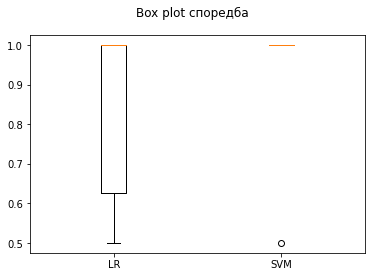

In [15]:
# Читај библиотеки
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# читај дата
X = xs
Y = ys

# спреми конфигурација за крос валидација (test harness)
seed = 2

# спреми модели во листа со имиња
models = []
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))

# евалуирај модел
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "(%s) Просек acc: %.2f , Стардна девијација acc: %.2f" % (name, cv_results.mean(), cv_results.std())
    print()
    if name == 'SVM':
        print("Suport vector machine", end="")
        print(f"\nПрецизност: {pred_SVM/dataset_len * 100:.2f}%")
    else: 
        print("Логистичка регресија", end="")
        print(f"\nПрецизност: {pred_LR/dataset_len * 100:.2f}%")
    print(msg)
    
# boxplot споредба
fig = plt.figure()
fig.suptitle('Box plot споредба')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()